# Gold Recovery

## Tabel Of Contents
* [Goal](#goal)
* [Data Description](#data_desc)
* [General Information](#general)
* [Data Preprocessing](#data_pre)
* [Analyze the data](#analyze)
* [Build the model](#build)
* [Conclusion](#con)

## Goal<a class="anchor" id="goal"></a>

Prepare a prototype of a machine learning model for Zyfra. The company develops efficiency solutions for heavy industry. The model should predict the amount of gold recovered from gold ore. You have the data on extraction and purification. The model will help to optimize the production and eliminate unprofitable parameters.

## Data Description<a class="anchor" id="data_desc"></a>

Technological process
* Rougher feed — raw material
* Rougher additions (or reagent additions) — flotation reagents: Xanthate, Sulphate, Depressant
* Xanthate — promoter or flotation activator;
* Sulphate — sodium sulphide for this particular process;
* Depressant — sodium silicate.
* Rougher process — flotation
* Rougher tails — product residues
* Float banks — flotation unit
* Cleaner process — purification
* Rougher Au — rougher gold concentrate
* Final Au — final gold concentrate

Parameters of stages
* air amount — volume of air
* fluid levels
* feed size — feed particle size
* feed rate

### General Information <a class="anchor" id="general"></a>



In [1]:
# import 
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats as st
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import make_scorer
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_validate,GridSearchCV
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.dummy import DummyRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor

# import warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
try:
    df_train = pd.read_csv("gold_recovery_train.csv")
    df_test = pd.read_csv("gold_recovery_test.csv")
    df_full = pd.read_csv("gold_recovery_full.csv")
except:
    df_train = pd.read_csv("/datasets/gold_recovery_train.csv")
    df_test = pd.read_csv("/datasets/gold_recovery_test.csv")
    df_full = pd.read_csv("/datasets/gold_recovery_full.csv")    

In [3]:
#looking at the first 5 row in datset
df_train.head()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


In [4]:
df_train.describe()

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,16788.000000,16788.000000,16490.000000,16789.000000,15339.000000,16794.000000,16677.000000,16715.000000,16794.000000,15553.000000,...,16731.000000,16747.000000,16768.000000,16767.000000,16775.000000,16775.000000,16775.000000,16776.000000,16757.000000,16775.000000
mean,4.716907,9.113559,8.301123,39.467217,67.213166,8.757048,2.360327,9.303932,2.687512,129.479789,...,19.101874,-494.164481,14.778164,-476.600082,15.779488,-500.230146,12.377241,-498.956257,18.429208,-521.801826
std,2.096718,3.389495,3.825760,13.917227,11.960446,3.634103,1.215576,4.263208,1.272757,45.386931,...,6.883163,84.803334,5.999149,89.381172,6.834703,76.983542,6.219989,82.146207,6.958294,77.170888
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000003,...,0.000000,-799.920713,0.000000,-800.021781,-0.423260,-799.741097,0.427084,-800.258209,0.024270,-810.473526
25%,3.971262,8.825748,6.939185,42.055722,62.625685,7.610544,1.641604,7.870275,2.172953,103.064021,...,14.508299,-500.837689,10.741388,-500.269182,10.977713,-500.530594,8.925586,-500.147603,13.977626,-501.080595
50%,4.869346,10.065316,8.557228,44.498874,67.644601,9.220393,2.453690,10.021968,2.781132,131.783108,...,19.986958,-499.778379,14.943933,-499.593286,15.998340,-499.784231,11.092839,-499.933330,18.034960,-500.109898
75%,5.821176,11.054809,10.289741,45.976222,72.824595,10.971110,3.192404,11.648573,3.416936,159.539839,...,24.983961,-494.648754,20.023751,-400.137948,20.000701,-496.531781,15.979467,-498.418000,24.984992,-499.565540
max,16.001945,17.031899,18.124851,53.611374,100.000000,19.552149,6.086532,22.317730,9.789625,251.999948,...,60.000000,-127.692333,28.003828,-71.472472,63.116298,-275.073125,39.846228,-120.190931,54.876806,-39.784927


In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 87 columns):
date                                                  16860 non-null object
final.output.concentrate_ag                           16788 non-null float64
final.output.concentrate_pb                           16788 non-null float64
final.output.concentrate_sol                          16490 non-null float64
final.output.concentrate_au                           16789 non-null float64
final.output.recovery                                 15339 non-null float64
final.output.tail_ag                                  16794 non-null float64
final.output.tail_pb                                  16677 non-null float64
final.output.tail_sol                                 16715 non-null float64
final.output.tail_au                                  16794 non-null float64
primary_cleaner.input.sulfate                         15553 non-null float64
primary_cleaner.input.depressant             

 Missing values present.

In [6]:
#looking at first 5 rows in test
df_test.head()

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
4,2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333


In [7]:
df_test.describe()

,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,5554.000000,5572.000000,5856.000000,5690.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,...,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000
mean,170.515243,8.482873,7.264651,1.321420,1481.990241,-509.057796,1486.908670,-511.743956,1468.495216,-509.741212,...,15.636031,-516.266074,13.145702,-476.338907,12.308967,-512.208126,9.470986,-505.017827,16.678722,-512.351694
std,49.608602,3.353105,0.611526,0.693246,310.453166,61.339256,313.224286,67.139074,309.980748,62.671873,...,4.660835,62.756748,4.304086,105.549424,3.762827,58.864651,3.312471,68.785898,5.404514,69.919839
min,0.000103,0.000031,5.650000,0.000003,0.000000,-799.773788,0.000000,-800.029078,0.000000,-799.995127,...,0.000000,-799.798523,0.000000,-800.836914,-0.223393,-799.661076,0.528083,-800.220337,-0.079426,-809.859706
25%,143.340022,6.411500,6.885625,0.888769,1497.190681,-500.455211,1497.150234,-500.936639,1437.050321,-501.300441,...,12.057838,-501.054741,11.880119,-500.419113,10.123459,-500.879383,7.991208,-500.223089,13.012422,-500.833821
50%,176.103893,8.023252,7.259333,1.183362,1554.659783,-499.997402,1553.268084,-500.066588,1546.160672,-500.079537,...,17.001867,-500.160145,14.952102,-499.644328,12.062877,-500.047621,9.980774,-500.001338,16.007242,-500.041085
75%,207.240761,10.017725,7.650000,1.763797,1601.681656,-499.575313,1601.784707,-499.323361,1600.785573,-499.009545,...,18.030985,-499.441529,15.940011,-401.523664,15.017881,-499.297033,11.992176,-499.722835,21.009076,-499.395621
max,274.409626,40.024582,15.500000,5.433169,2212.432090,-57.195404,1975.147923,-142.527229,1715.053773,-150.937035,...,30.051797,-401.565212,31.269706,-6.506986,25.258848,-244.483566,14.090194,-126.463446,26.705889,-29.093593


In [8]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5856 entries, 0 to 5855
Data columns (total 53 columns):
date                                          5856 non-null object
primary_cleaner.input.sulfate                 5554 non-null float64
primary_cleaner.input.depressant              5572 non-null float64
primary_cleaner.input.feed_size               5856 non-null float64
primary_cleaner.input.xanthate                5690 non-null float64
primary_cleaner.state.floatbank8_a_air        5840 non-null float64
primary_cleaner.state.floatbank8_a_level      5840 non-null float64
primary_cleaner.state.floatbank8_b_air        5840 non-null float64
primary_cleaner.state.floatbank8_b_level      5840 non-null float64
primary_cleaner.state.floatbank8_c_air        5840 non-null float64
primary_cleaner.state.floatbank8_c_level      5840 non-null float64
primary_cleaner.state.floatbank8_d_air        5840 non-null float64
primary_cleaner.state.floatbank8_d_level      5840 non-null float64
rougher.in

Missing values present.

In [9]:
#looking at first 5 rows in full
df_full.head()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


In [10]:
df_full.describe()

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,22627.000000,22629.000000,22331.000000,22630.000000,20753.000000,22633.000000,22516.000000,22445.000000,22635.000000,21107.000000,...,22571.000000,22587.000000,22608.000000,22607.000000,22615.000000,22615.000000,22615.000000,22616.000000,22597.000000,22615.000000
mean,4.781559,9.095308,8.640317,40.001172,67.447488,8.923690,2.488252,9.523632,2.827459,140.277672,...,18.205125,-499.878977,14.356474,-476.532613,14.883276,-503.323288,11.626743,-500.521502,17.976810,-519.361465
std,2.030128,3.230797,3.785035,13.398062,11.616034,3.517917,1.189407,4.079739,1.262834,49.919004,...,6.560700,80.273964,5.655791,93.822791,6.372811,72.925589,5.757449,78.956292,6.636203,75.477151
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000003,...,0.000000,-799.920713,0.000000,-800.836914,-0.423260,-799.741097,0.427084,-800.258209,-0.079426,-810.473526
25%,4.018525,8.750171,7.116799,42.383721,63.282393,7.684016,1.805376,8.143576,2.303108,110.177081,...,14.095940,-500.896232,10.882675,-500.309169,10.941299,-500.628697,8.037533,-500.167897,13.968418,-500.981671
50%,4.953729,9.914519,8.908792,44.653436,68.322258,9.484369,2.653001,10.212998,2.913794,141.330501,...,18.007326,-499.917108,14.947646,-499.612292,14.859117,-499.865158,10.989756,-499.951980,18.004215,-500.095463
75%,5.862593,10.929839,10.705824,46.111999,72.950836,11.084557,3.287790,11.860824,3.555077,174.049914,...,22.998194,-498.361545,17.977502,-400.224147,18.014914,-498.489381,14.001193,-499.492354,23.009704,-499.526388
max,16.001945,17.031899,19.615720,53.611374,100.000000,19.552149,6.086532,22.861749,9.789625,274.409626,...,60.000000,-127.692333,31.269706,-6.506986,63.116298,-244.483566,39.846228,-120.190931,54.876806,-29.093593


In [11]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22716 entries, 0 to 22715
Data columns (total 87 columns):
date                                                  22716 non-null object
final.output.concentrate_ag                           22627 non-null float64
final.output.concentrate_pb                           22629 non-null float64
final.output.concentrate_sol                          22331 non-null float64
final.output.concentrate_au                           22630 non-null float64
final.output.recovery                                 20753 non-null float64
final.output.tail_ag                                  22633 non-null float64
final.output.tail_pb                                  22516 non-null float64
final.output.tail_sol                                 22445 non-null float64
final.output.tail_au                                  22635 non-null float64
primary_cleaner.input.sulfate                         21107 non-null float64
primary_cleaner.input.depressant             

Missing values present.

#### Conclusion

- Missing values present.
- Need to replace date column in each data set to datetime objects.
- There are 16860 observations in the train set and 5856 observations in the test set.
- There are 87 features in the train set and only 53 features in the test.

#### Recovery Calculation  <a class="anchor" id="recovery"></a>

It's to simulate the process of recovering gold from gold ore.

Where: 
* C — share of gold in the concentrate right after flotation (for finding the rougher concentrate recovery)/after purification (for finding the final concentrate recovery)
* F — share of gold in the feed before flotation (for finding the rougher concentrate recovery)/in the concentrate right after flotation (for finding the final concentrate recovery)
* T — share of gold in the rougher tails right after flotation (for finding the rougher concentrate recovery)/after purification (for finding the final concentrate recovery)

$$Recovery =  \frac{C*(F-T)}{F*(C-T)}* 100$$

In [12]:
C = df_train['rougher.output.concentrate_au']
F = df_train['rougher.input.feed_au']
T = df_train['rougher.output.tail_au']

recovery_calc = ((C*(F-T)) / (F*(C-T)))*100
recovery_calc

0        87.107763
1        86.843261
2        86.842308
3        87.226430
4        86.688794
           ...    
16855    89.574376
16856    87.724007
16857    88.890579
16858    89.858126
16859    89.514960
Length: 16860, dtype: float64

In [13]:
#mae calculation
MAE = (recovery_calc - df_train['rougher.output.recovery']).abs().mean()
MAE

9.444891926100695e-15

#### Conclusion
The MAE value is close to the 'rougher.output.recovery' and the calculations for it where done correctly since MAE value is 0.

### Data Preprocessing<a class="anchor" id="data_pre"></a>


#### selecting columns that are present in both train and test

In [14]:
# selecting columns that are present in both train and test
train_test_columns =  list(set(df_train.columns).intersection(set(df_test.columns)))
train_test_columns.sort()
train_test_columns

['date',
 'primary_cleaner.input.depressant',
 'primary_cleaner.input.feed_size',
 'primary_cleaner.input.sulfate',
 'primary_cleaner.input.xanthate',
 'primary_cleaner.state.floatbank8_a_air',
 'primary_cleaner.state.floatbank8_a_level',
 'primary_cleaner.state.floatbank8_b_air',
 'primary_cleaner.state.floatbank8_b_level',
 'primary_cleaner.state.floatbank8_c_air',
 'primary_cleaner.state.floatbank8_c_level',
 'primary_cleaner.state.floatbank8_d_air',
 'primary_cleaner.state.floatbank8_d_level',
 'rougher.input.feed_ag',
 'rougher.input.feed_au',
 'rougher.input.feed_pb',
 'rougher.input.feed_rate',
 'rougher.input.feed_size',
 'rougher.input.feed_sol',
 'rougher.input.floatbank10_sulfate',
 'rougher.input.floatbank10_xanthate',
 'rougher.input.floatbank11_sulfate',
 'rougher.input.floatbank11_xanthate',
 'rougher.state.floatbank10_a_air',
 'rougher.state.floatbank10_a_level',
 'rougher.state.floatbank10_b_air',
 'rougher.state.floatbank10_b_level',
 'rougher.state.floatbank10_c_air'

In [15]:
#columns in Train but NOT in Test
train_not_test_columns = list(set(df_train.columns)-set(df_test.columns))
train_not_test_columns.sort()
train_not_test_columns

['final.output.concentrate_ag',
 'final.output.concentrate_au',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.recovery',
 'final.output.tail_ag',
 'final.output.tail_au',
 'final.output.tail_pb',
 'final.output.tail_sol',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_au',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_sol',
 'rougher.calculation.au_pb_ratio',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_au',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.recovery',
 'rougher.output.tail_ag',
 'rougher.output.tail_au',
 'rougher.output.ta

#### Missing Values

In [16]:
df_train.shape

(16860, 87)

In [17]:
# seeing the missing values
#missing_col [train_test_columns]
df_train.isnull().sum()/df_train.shape[0]

date                                          0.000000
final.output.concentrate_ag                   0.004270
final.output.concentrate_pb                   0.004270
final.output.concentrate_sol                  0.021945
final.output.concentrate_au                   0.004211
                                                ...   
secondary_cleaner.state.floatbank5_a_level    0.005042
secondary_cleaner.state.floatbank5_b_air      0.005042
secondary_cleaner.state.floatbank5_b_level    0.004982
secondary_cleaner.state.floatbank6_a_air      0.006109
secondary_cleaner.state.floatbank6_a_level    0.005042
Length: 87, dtype: float64

In [18]:
df_test.isnull().sum()/df_test.shape[0]

date                                          0.000000
primary_cleaner.input.sulfate                 0.051571
primary_cleaner.input.depressant              0.048497
primary_cleaner.input.feed_size               0.000000
primary_cleaner.input.xanthate                0.028347
primary_cleaner.state.floatbank8_a_air        0.002732
primary_cleaner.state.floatbank8_a_level      0.002732
primary_cleaner.state.floatbank8_b_air        0.002732
primary_cleaner.state.floatbank8_b_level      0.002732
primary_cleaner.state.floatbank8_c_air        0.002732
primary_cleaner.state.floatbank8_c_level      0.002732
primary_cleaner.state.floatbank8_d_air        0.002732
primary_cleaner.state.floatbank8_d_level      0.002732
rougher.input.feed_ag                         0.002732
rougher.input.feed_pb                         0.002732
rougher.input.feed_rate                       0.006831
rougher.input.feed_size                       0.003757
rougher.input.feed_sol                        0.011441
rougher.in

In [19]:
# filling in missing values
df_test.fillna(method = 'ffill',axis = 0, inplace = True)
df_train.fillna(method = 'ffill', axis = 0, inplace = True)
df_full.fillna(method = 'ffill', axis = 0, inplace = True)

In [20]:
df_test = df_test.merge(df_full[['date', 'final.output.recovery', 'rougher.output.recovery']], 
                        how='left', on='date')

In [21]:
df_test.isnull().sum()

date                                          0
primary_cleaner.input.sulfate                 0
primary_cleaner.input.depressant              0
primary_cleaner.input.feed_size               0
primary_cleaner.input.xanthate                0
primary_cleaner.state.floatbank8_a_air        0
primary_cleaner.state.floatbank8_a_level      0
primary_cleaner.state.floatbank8_b_air        0
primary_cleaner.state.floatbank8_b_level      0
primary_cleaner.state.floatbank8_c_air        0
primary_cleaner.state.floatbank8_c_level      0
primary_cleaner.state.floatbank8_d_air        0
primary_cleaner.state.floatbank8_d_level      0
rougher.input.feed_ag                         0
rougher.input.feed_pb                         0
rougher.input.feed_rate                       0
rougher.input.feed_size                       0
rougher.input.feed_sol                        0
rougher.input.feed_au                         0
rougher.input.floatbank10_sulfate             0
rougher.input.floatbank10_xanthate      

In [22]:
df_train = df_train.dropna()
df_test = df_test.dropna()
df_full = df_full.dropna()

In [23]:
df_train.isnull().sum()

date                                          0
final.output.concentrate_ag                   0
final.output.concentrate_pb                   0
final.output.concentrate_sol                  0
final.output.concentrate_au                   0
                                             ..
secondary_cleaner.state.floatbank5_a_level    0
secondary_cleaner.state.floatbank5_b_air      0
secondary_cleaner.state.floatbank5_b_level    0
secondary_cleaner.state.floatbank6_a_air      0
secondary_cleaner.state.floatbank6_a_level    0
Length: 87, dtype: int64

In [24]:
df_test.isnull().sum()

date                                          0
primary_cleaner.input.sulfate                 0
primary_cleaner.input.depressant              0
primary_cleaner.input.feed_size               0
primary_cleaner.input.xanthate                0
primary_cleaner.state.floatbank8_a_air        0
primary_cleaner.state.floatbank8_a_level      0
primary_cleaner.state.floatbank8_b_air        0
primary_cleaner.state.floatbank8_b_level      0
primary_cleaner.state.floatbank8_c_air        0
primary_cleaner.state.floatbank8_c_level      0
primary_cleaner.state.floatbank8_d_air        0
primary_cleaner.state.floatbank8_d_level      0
rougher.input.feed_ag                         0
rougher.input.feed_pb                         0
rougher.input.feed_rate                       0
rougher.input.feed_size                       0
rougher.input.feed_sol                        0
rougher.input.feed_au                         0
rougher.input.floatbank10_sulfate             0
rougher.input.floatbank10_xanthate      

#### Duplicates

In [25]:
#checking for duplicates
df_train.duplicated().sum()

0

In [26]:
#checking for duplicates
df_test.duplicated().sum()

0

####  Data type conversion

In [27]:
#converting date to datetime
df_full['date'] = pd.to_datetime(df_full.date)
df_full.sort_values('date',inplace=True)
df_train['date'] = pd.to_datetime(df_train.date)
df_train.sort_values('date',inplace=True)
df_test['date'] = pd.to_datetime(df_test.date)
df_test.sort_values('date',inplace=True)

### Analyze the data<a class="anchor" id="analyze"></a>

Let's see how the concentrations of metals (Au, Ag, Pb) change depending on the purification stage.


In [28]:
au = ['rougher.output.concentrate_au', 'primary_cleaner.output.concentrate_au', 'secondary_cleaner.output.tail_au','final.output.concentrate_au']
ag = ['rougher.output.concentrate_ag', 'primary_cleaner.output.concentrate_ag', 'secondary_cleaner.output.tail_ag','final.output.concentrate_ag']
pb = ['rougher.output.concentrate_pb', 'primary_cleaner.output.concentrate_pb', 'secondary_cleaner.output.tail_pb','final.output.concentrate_pb']

def plot_stages(df, element):
    for stage in element:
        df[stage].plot(kind='hist', bins = 70, legend=True, alpha=0.5)
        plt.xlabel("Concentration")
        plt.ylim(0,2500)


Text(0.5, 1.0, 'Metal Au')

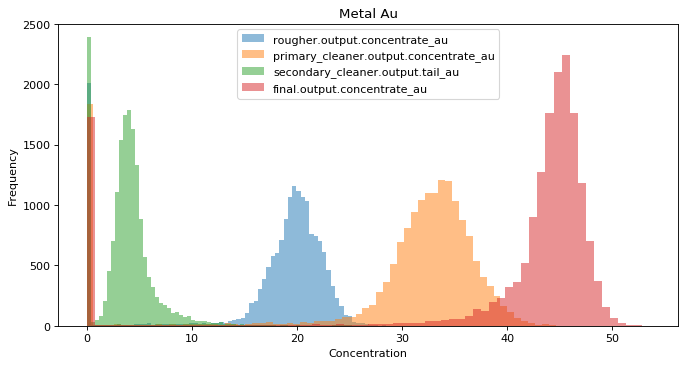

In [29]:
from matplotlib.pyplot import figure
figure(figsize=(10, 5), dpi=80)
plot_stages(df_train, au)
plt.title('Metal Au')

Text(0.5, 1.0, 'Metal Ag')

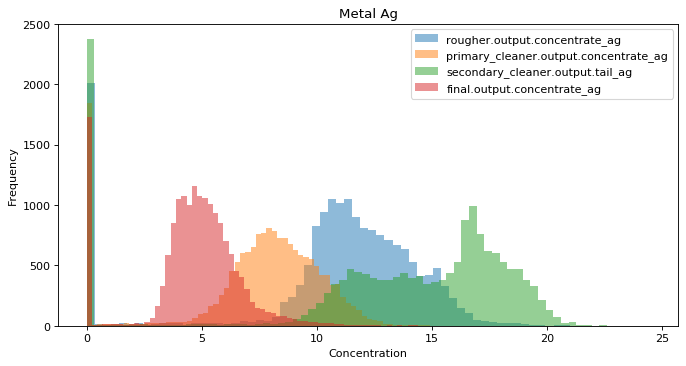

In [30]:
figure(figsize=(10, 5), dpi=80)
plot_stages(df_train, ag)
plt.title('Metal Ag')

Text(0.5, 1.0, 'Metal Pb')

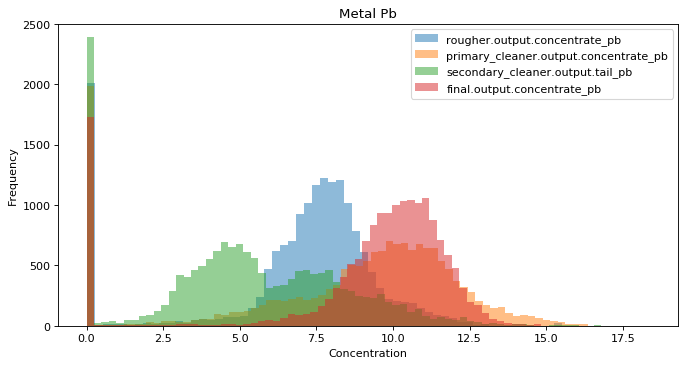

In [31]:
figure(figsize=(10, 5), dpi=80)
plot_stages(df_train, pb)
plt.title('Metal Pb')

- Metal Au(gold) concentration is higher after the purification stages and retains more metal. The secondary stage did not seem useful for the concentration. 
- Metal Ag(Silver) has a lower concentration. The more it purified the less metal we get. The secondary stage does not show much help in improvement.
- Metal Pb(Lead) shows there is slight improvement after the primary stage and the final concentration. The secondary stage seems to show no improvement. 

#### Comparing feed particle size distributions

Compare the feed particle size distributions in the training set and in the test set through analysis.

Text(0, 0.5, 'frequency')

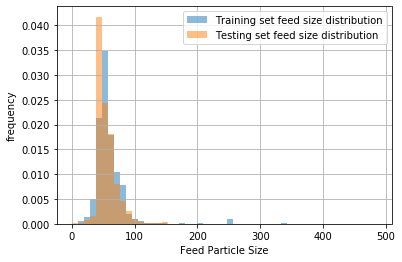

In [32]:
df_train['rougher.input.feed_size'].hist(label = 'Training set feed size distribution', alpha = 0.5, bins = 50, density = True)
df_test['rougher.input.feed_size'].hist(label= 'Testing set feed size distribution', alpha = 0.5, bins = 50, density = True)
plt.legend()
plt.xlabel("Feed Particle Size")
plt.ylabel("frequency")

The distrubution looks similar with each other.

#### Compare the total concentrations of all substances at different stages

- raw feed,
- rougher concentrate,
- final concentrate


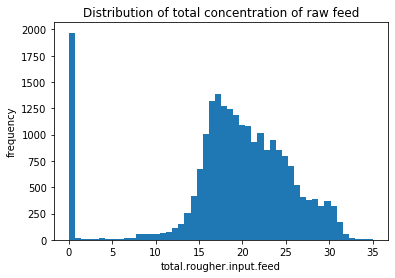

In [33]:
df_full['total.rougher.input.feed'] = df_full[['rougher.input.feed_ag', 'rougher.input.feed_pb', 'rougher.input.feed_au']].sum(axis=1)
df_full['total.rougher.input.feed'].hist(bins = 50, grid = False)
plt.xlabel('total.rougher.input.feed')
plt.ylabel('frequency')
plt.title("Distribution of total concentration of raw feed");

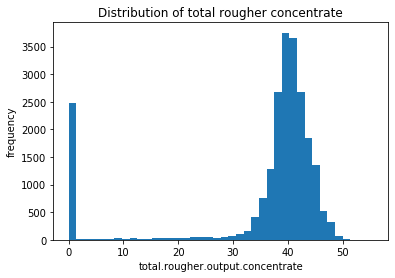

In [34]:
df_full['total.rougher.output.concentrate'] = df_full[['rougher.output.concentrate_ag', 'rougher.output.concentrate_pb', 'rougher.output.concentrate_au']].sum(axis=1)
df_full['total.rougher.output.concentrate'].hist(bins = 40, grid = False)
plt.xlabel('total.rougher.output.concentrate')
plt.ylabel('frequency')
plt.title("Distribution of total rougher concentrate");

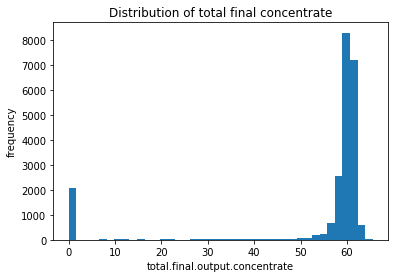

In [35]:
df_full['total.final.output.concentrate'] = df_full[['final.output.concentrate_ag', 'final.output.concentrate_pb', 'final.output.concentrate_au']].sum(axis=1)
df_full['total.final.output.concentrate'].hist(bins = 40, grid = False)
plt.xlabel('total.final.output.concentrate')
plt.ylabel('frequency')
plt.title("Distribution of total final concentrate");

- The distribution for raw feed shows that it is right skewed with outliers present.
- The distribution for rougher concentrate shows that there is a left tail of outliers present.
- The final concentrate shows there are outliers present.
- For all distributions there seems to be a large amrount of outliers present at 0 which need to be removed.

#### Outlier removal

In [36]:
#remove outlier and for IQR
def remove_outlier(df_fill, col_name):
    q1 = df_fill[col_name].quantile(0.25)
    q3 = df_fill[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    lower_limit = q1 - 1.5*iqr
    upper_limit = q3 + 1.5*iqr
    df_final = df_fill.loc[(df_fill[col_name] > lower_limit) & (df_fill[col_name] < upper_limit)]
    return df_final

In [37]:
# Selecting parameter to remove outler for price
df_new_full = remove_outlier(df_full, 'total.rougher.input.feed')
df_new_full = remove_outlier(df_full,'total.rougher.output.concentrate')
df_new_full = remove_outlier(df_full,'total.final.output.concentrate')

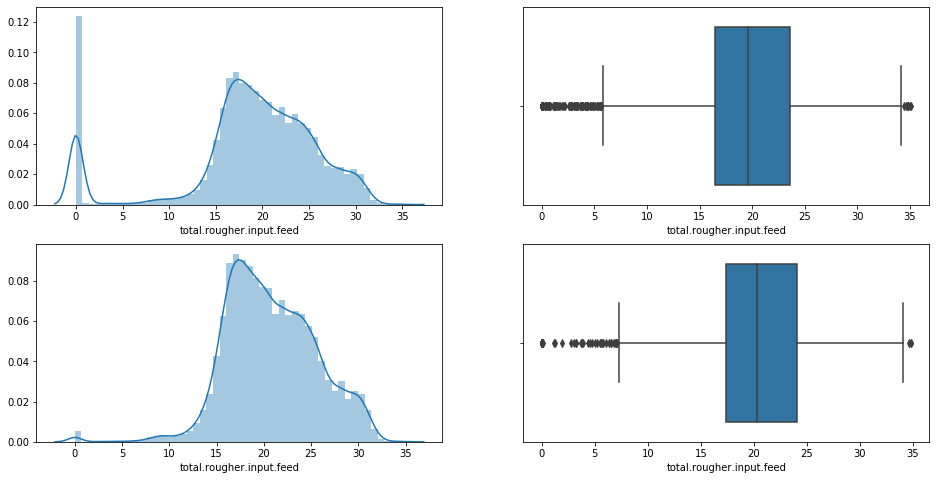

In [38]:
#subplot or ogrinal vs outlier removed graph
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df_full['total.rougher.input.feed'])
plt.subplot(2,2,2)
sns.boxplot(df_full['total.rougher.input.feed'])
plt.subplot(2,2,3)
sns.distplot(df_new_full['total.rougher.input.feed'])
plt.subplot(2,2,4)
sns.boxplot(df_new_full['total.rougher.input.feed'])
plt.show()

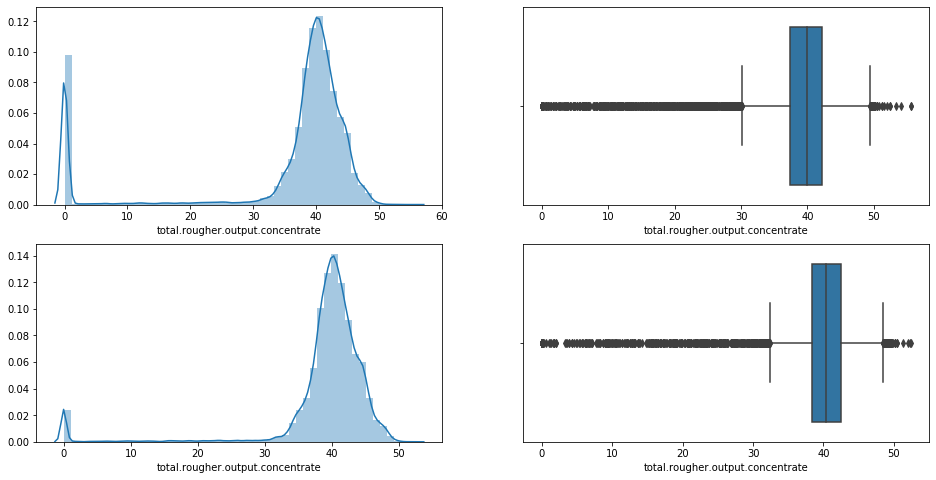

In [39]:
#subplot or ogrinal vs outlier removed graph
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df_full['total.rougher.output.concentrate'])
plt.subplot(2,2,2)
sns.boxplot(df_full['total.rougher.output.concentrate'])
plt.subplot(2,2,3)
sns.distplot(df_new_full['total.rougher.output.concentrate'])
plt.subplot(2,2,4)
sns.boxplot(df_new_full['total.rougher.output.concentrate'])
plt.show()

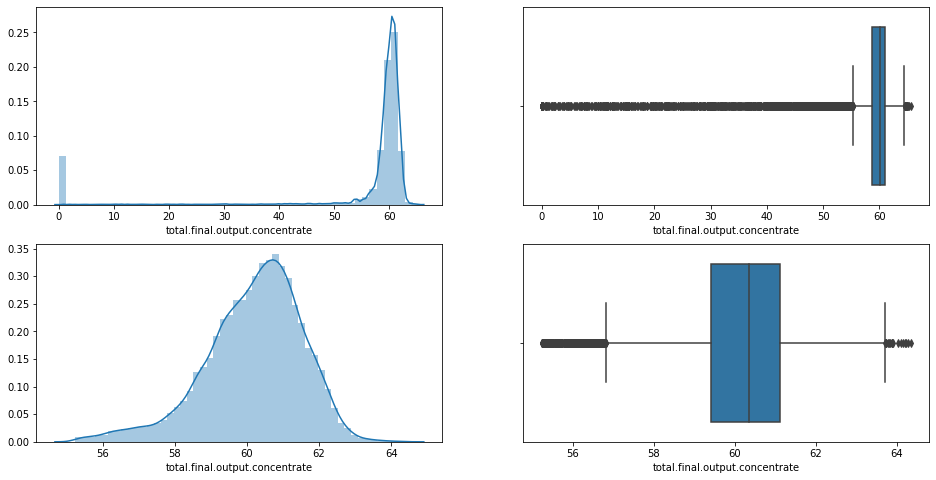

In [40]:
#subplot or ogrinal vs outlier removed graph
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df_full['total.final.output.concentrate'])
plt.subplot(2,2,2)
sns.boxplot(df_full['total.final.output.concentrate'])
plt.subplot(2,2,3)
sns.distplot(df_new_full['total.final.output.concentrate'])
plt.subplot(2,2,4)
sns.boxplot(df_new_full['total.final.output.concentrate'])
plt.show()

We have removed the outliers present, but now we have to handel the removal of training and testing set outliers. To do so we will use the new full data set which we removied outliers room to split into training and testing sets.

In [41]:
# make date column the index in dataset
df_new_full.set_index('date', inplace=True)
df_train.set_index('date', inplace=True)
df_test.set_index('date', inplace=True)

In [42]:
# index of train set in full dataset
df_train_index = df_new_full.index.intersection(df_train.index)
df_train_index.shape

(14357,)

In [43]:
# new train dataset
df_new_train = df_new_full.loc[df_train_index]
df_new_train.reset_index(inplace=True)
df_new_train.head()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level,total.rougher.input.feed,total.rougher.output.concentrate,total.final.output.concentrate
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980,14.871440,38.395653,58.137072
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184,14.905729,38.945647,58.699942
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363,14.638299,38.649756,58.927421
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129,14.199305,38.411473,58.714815
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691,13.511497,38.867359,59.065251


In [44]:
# index of test set in full dataset
df_test_index = df_new_full.index.intersection(df_test.index)
df_test_index.shape

(5110,)

In [45]:
# new test dataset
df_new_test= df_new_full.loc[df_test_index]
df_new_test.reset_index(inplace=True)
df_new_test.head()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level,total.rougher.input.feed,total.rougher.output.concentrate,total.final.output.concentrate
0,2016-09-01 00:59:59,7.578381,10.466295,11.990938,40.743891,70.273583,12.688885,3.844413,11.075686,4.537988,...,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414,30.849382,46.147906,58.788566
1,2016-09-01 01:59:59,7.813838,10.581152,12.216172,39.604292,68.910432,12.829171,3.918901,11.132824,4.675117,...,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438,30.481322,46.914165,57.999282
2,2016-09-01 02:59:59,7.623392,10.424024,12.313710,40.724190,68.143213,12.977846,4.026561,10.990134,4.828907,...,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559,30.656305,45.489926,58.771605
3,2016-09-01 03:59:59,8.552457,10.503229,13.074570,39.290997,67.776393,12.451947,3.780702,11.155935,4.969620,...,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987,29.696862,46.559998,58.346683
4,2016-09-01 04:59:59,8.078781,10.222788,12.475427,40.254524,61.467078,11.827846,3.632272,11.403663,5.256806,...,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333,27.385235,46.269598,58.556092


### Build the model<a class="anchor" id="build"></a>


#### sMAPE 

sMAPE is a new evaluation metric. It is called sMAPE, symmetric Mean Absolute Percentage Error. It is similar to MAE, but is expressed in relative values instead of absolute ones. Why is it symmetrical? It equally takes into account the scale of both the target and the prediction.

- We need to predict two values:
    * rougher concentrate recovery rougher.output.recovery
    * final concentrate recovery final.output.recovery

Denotations: 

$$y_i$$ 
* Value of target for the observation with the i index in the sample used to measure quality.
$$\hat{y_i}$$ 
* Value of prediction for the observation with the i index, for example, in the test sample.
$$N$$
* Number of observations in the sample.
$$\sum_{i=1}^{N} $$
* Summation over all observations of the sample (i takes values from 1 to N).

Here’s how sMAPE is calculated:

$$sMAPE = \frac{1}{N} \sum_{i=1}^{N} (\frac{|y_i-\hat{y_i}|}{(|y_i|+\hat{|y_i|})/2})*100\%$$



The final metric includes the two values:
$$Final sMAPE = 25\% * sMAPE(rougher) + 75\% * sMAPE(Final)$$

#### Function for smape and final smape

In [56]:
# function to calculate sMAPE value.
def smape(target, predictions):
    return (np.abs(target - predictions)/((np.abs(target) + np.abs(predictions))/2)).mean()

# function to calculate the final_smape 
def final_smape(target, prediction):
    rough = smape(target[:,0], prediction[:,0])
    final = smape(target[:,1], prediction[:,1])
    return (0.25 * rough + 0.75 * final)
#create scorer
smape_score = make_scorer(final_smape, greater_is_better = False)

#### Training and Testing model

In [57]:
# declaring the target and features variable
features_train = df_new_train.drop(['date','rougher.output.recovery', 'final.output.recovery'], axis=1)
target_train = df_new_train[['rougher.output.recovery', 'final.output.recovery']].values
features_test = df_new_test.drop(['date','rougher.output.recovery', 'final.output.recovery'], axis=1)
target_test = df_new_test[['rougher.output.recovery', 'final.output.recovery']].values

# features scaling
scaler = StandardScaler()
features_train = scaler.fit_transform(features_train)
features_test  = scaler.transform(features_test)

#### Sanity Check

In [58]:
# baseline model using a dummy model regressor
dummy_model = DummyRegressor(strategy="mean")
dummy_model.fit(features_train, target_train)
dummy_pred = dummy_model.predict(features_test)
final_smape(target_test, dummy_pred)


0.08863396949938634

Our baseline for our final sMAPE is 8.86% we can try other models and try to improve this score.

#### Random Forest 

In [59]:
random_forest = RandomForestRegressor(random_state=12345)
random_params = {
    'n_estimators':range(10,50,100),
    'max_depth': range(2,7)
}
rf_result = GridSearchCV(random_forest, random_params,scoring=smape_score)
rf_result.fit(features_train, target_train)
rf_predictions = rf_result.predict(features_test)
print('The final sMAPE is: {:.2%}'.format(final_smape(target_test,rf_predictions )))

The final sMAPE is: 8.06%


#### Linear Regression

In [60]:
lr_regr = LinearRegression()
lr_regr.fit(features_train, target_train) # train the model 
lr_regr_test_predictions = lr_regr.predict(features_test)

cv_score_lr = cross_val_score(lr_regr, features_train, target_train, cv=5, scoring=smape_score)
print('Mean smape:  {:.2%}'.format(cv_score_lr.mean()))
print('The sMAPE range of values are: ', cv_score_lr)
print('The final sMAPE score is: {:.2%}'.format(final_smape(target_test, lr_regr_test_predictions)))



Mean smape:  -6.08%
The sMAPE range of values are:  [-0.05566152 -0.04054052 -0.06396623 -0.0836606  -0.06024311]
The final sMAPE score is: 4.49%


#### Decision Tree

In [61]:
# define the cross validation scheme
for i in [1, 2, 8, 15]:
    dt = DecisionTreeRegressor(max_depth = i, random_state = 12345)
    dt.fit(features_train, target_train)
    scores_dt = cross_val_score(dt, features_train, target_train, cv=5, scoring=smape_score)
    print('Max depth: ' + str(i) + ', Mean sMAPE: {:.4%}'.format(scores_dt.mean()))

Max depth: 1, Mean sMAPE: -11.4381%
Max depth: 2, Mean sMAPE: -11.3693%
Max depth: 8, Mean sMAPE: nan%
Max depth: 15, Mean sMAPE: nan%


In [62]:
# define hyperparameters to tune
parameters= {
    "max_depth" : [1, 2, 8, 15]
    }
# define the model
dt_regressor = DecisionTreeRegressor()

grid_search_dt = GridSearchCV(dt_regressor, parameters, scoring=smape_score)
grid_search_dt.fit(features_train, target_train)
# summarize result
print('The best hyperparameters are: {}'.format(grid_search_dt.best_params_))

The best hyperparameters are: {'max_depth': 1}


In [63]:
# decision tree regressor model to compute evalu metric
def decision_tree_regressor(X_train, y_train, X_test, y_test):
    dt_model = DecisionTreeRegressor(**grid_search_dt.best_params_)
    dt_model.fit(X_train, y_train) 
    dt_test_predictions = dt_model.predict(X_test)
    print('The final sMAPE is: {:.2%}'.format(final_smape(target_test, dt_test_predictions)))

In [64]:
# final sMAPE for decision tree regressor
decision_tree_regressor(features_train, target_train, features_test, target_test)

The final sMAPE is: 8.41%


#### Lasso

In [65]:
lasso = Lasso(random_state=12345)
alpha = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
lasso_params = dict(alpha=alpha)
lasso_result = GridSearchCV(lasso, lasso_params,scoring=smape_score,refit='SMAPE',n_jobs=-1)
lasso_result.fit(features_train, target_train) 
pred_train_lasso= lasso_result.predict(features_test)
print('The final sMAPE is: {:.2%}'.format(final_smape(target_test, pred_train_lasso)))

The final sMAPE is: 3.35%


### Conclusion<a class="anchor" id="con"></a>


We were successfully able to prepare a prototype of a machine learning model to help the company develops efficient solutions for heavy industry. 

We data preprocessed and removed all missing and we then proceeded to calculate the recovery for the 'rougher.output.recovery' feature using the training set. We computed the mean absolute error between the calculated value and feature values and found the MAE to be 9.444891926100695e-15 which is 0.

In addition, we took note of how the concentrations of metals (Au, Ag, Pb) change depending on the purification stage. And found how Au has a higher concentration after purification stages, and ag has the lowest concentration. Pb has a higher concentration than Ag. Furthermore, we analyzed the data and looked into the total concentrations of all substances at different stages: raw feed, rougher concentrate, and final concentrate. From there we found some abnormal values in the total distribution and removed them from the data. 


During the training and testing stages, we were able to implement different models and evaluate them using cross-validation models. We created a sMape function to help calulate our final values. The models used includes Random Forest Regressor, Decision Tree Regression, Linear Regression, and Lasso. Our baseline model was 8.86 and from computing our final sMAPE we found the models to have these values: 

* Random Forest Regressor: 8.06
* Linear Regression: 4.49
* Descision Tree Regressor: 8.41
* Lasso: 3.35

We found the best model to be lasso and secound is linear regression since Lower MAPE values are better. Overall, with  this model was able to predict the amount of gold recovered and optimize gold production.